In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.drop(columns = ['User ID','Gender'])
df.sample(5)

,Age,EstimatedSalary,Purchased
24,46,23000,1
42,35,108000,0
120,36,75000,0
326,41,72000,0
134,28,55000,0


In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [11]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
# fit, learn model hmesa training data se krta h
# but transform training or testing data dono ko krte h
# yha .fit n mean, sd calculate kia h
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [14]:
# numpy array return krke deta h ye scaler fxn, hme pandas m vapis dataframe ki form m convert krna pdega
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


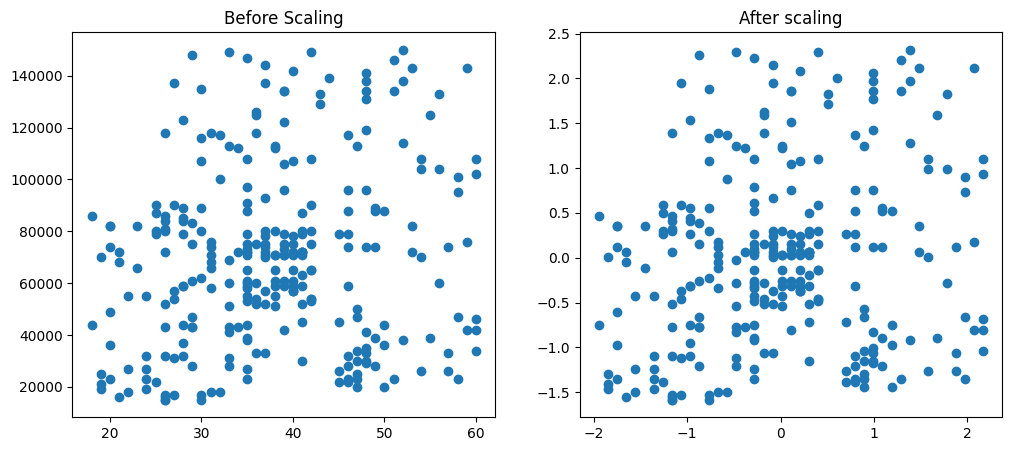

In [ ]:
# mean = 0 , sd = 1 after scaling
# effect of scale
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title('After scaling')
plt.show()

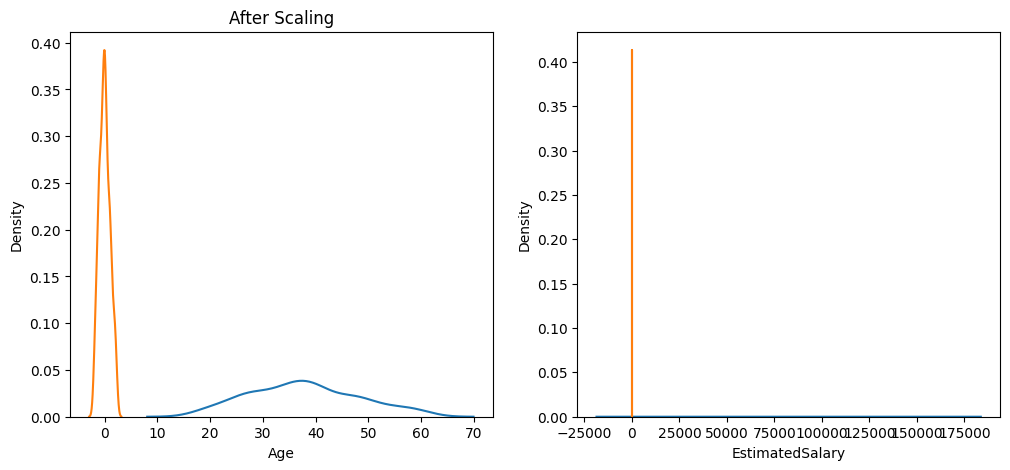

In [18]:
# before scaling or after scaling m distribution or relative distances m kuch frk nhi pda, bs scale m change aya h or data mean centric hogya h
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax2)
# after scaling
ax1.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax1)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()